In [1]:
from google.colab import files
import pandas as pd

# Upload "cleaned_merged_tracks.csv"
uploaded_cleaned = files.upload()

# Get the file name (first key in the uploaded dictionary)
file = list(uploaded_cleaned.keys())[0]

# Load the CSV file
final_df = pd.read_csv(file, encoding='ISO-8859-1')

# Display first few rows
final_df.head()

Saving cleaned_merged_tracks.csv to cleaned_merged_tracks.csv


,album_title,album_release_date,track_genre_top,track_listens
0,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1293
1,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,514
2,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1151
3,Constant Hitmaker,2008-02-06 00:00:00,Pop,50135
4,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,943


In [2]:
print(final_df.dtypes)


album_title           object
album_release_date    object
track_genre_top       object
track_listens          int64
dtype: object


In [3]:
print(final_df.describe())  # Gives statistics on numerical columns


       track_listens
count   38196.000000
mean     1281.596450
std      4865.932942
min         2.000000
25%       207.000000
50%       476.000000
75%      1147.000000
max    543252.000000


In [ ]:
print(final_df.sort_values("track_listens", ascending=False).head(10))


                        album_title   album_release_date track_genre_top  \
11308              Directionless EP  2011-01-18 00:00:00      Electronic   
17817                    Enthusiast  2011-08-30 00:00:00      Electronic   
14298  The agency of missing hearts  2010-02-11 00:00:00            Rock   
4531                      demo 2008  2008-11-01 00:00:00            Jazz   
10481     netBloc Vol. 30: aldartea  2010-11-02 00:00:00       Classical   
7196            Forget And Remember  2004-01-01 00:00:00         Hip-Hop   
17270                     LASERS EP  2012-06-04 00:00:00      Electronic   
21802           C3S :: Ignition Mix  2013-07-07 00:00:00            Rock   
14634                Bad Panda #109  2011-11-28 00:00:00      Electronic   
16913         Heavy, Crazy, Serious  2012-03-19 00:00:00         Hip-Hop   

       track_listens  
11308         543252  
17817         335215  
14298         178139  
4531          143278  
10481         143142  
7196          131509  
17

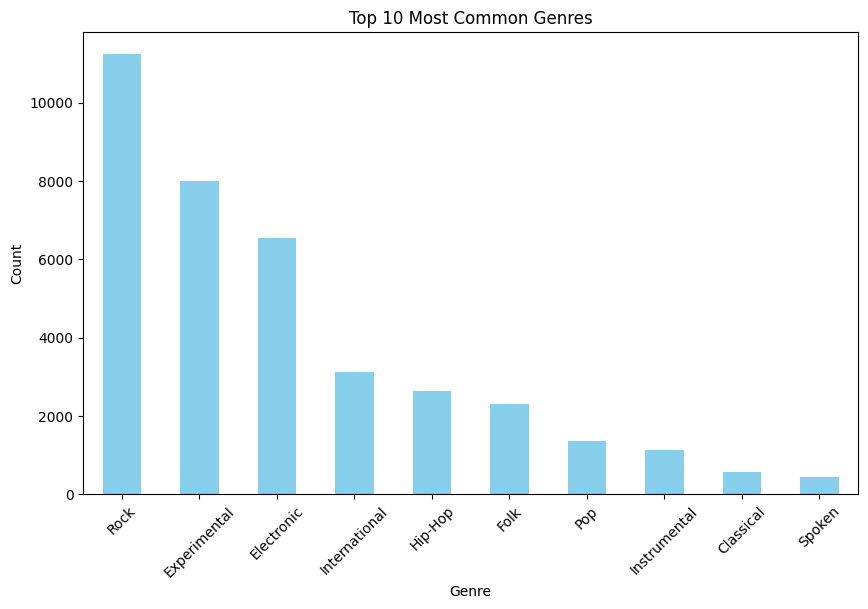

In [4]:
import matplotlib.pyplot as plt

# Count occurrences of each genre
genre_counts = final_df["track_genre_top"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Most Common Genres")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(genre_counts)

track_genre_top
Rock                   11237
Experimental            7996
Electronic              6550
International           3111
Hip-Hop                 2633
Folk                    2296
Pop                     1365
Instrumental            1124
Classical                564
Spoken                   446
Jazz                     431
Soul-RnB                 127
Old-Time / Historic      116
Country                  105
Blues                     78
Easy Listening            17
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert album_release_date to datetime format
final_df["album_release_date"] = pd.to_datetime(final_df["album_release_date"], errors="coerce")

# Extract only the year
final_df["release_year"] = final_df["album_release_date"].dt.year

# Display to confirm changes
print(final_df[["album_release_date", "release_year"]].head(20))


   album_release_date  release_year
0          2009-01-05          2009
1          2009-01-05          2009
2          2009-01-05          2009
3          2008-02-06          2008
4          2009-01-05          2009
5          2009-01-07          2009
6          2009-01-07          2009
7          2009-01-07          2009
8          2009-01-07          2009
9          2006-12-01          2006
10         2006-12-01          2006
11         2009-01-16          2009
12         2007-05-22          2007
13         2009-01-16          2009
14         2005-01-25          2005
15         2009-01-06          2009
16         2009-01-06          2009
17         1995-01-01          1995
18         1995-01-01          1995
19         2009-01-15          2009


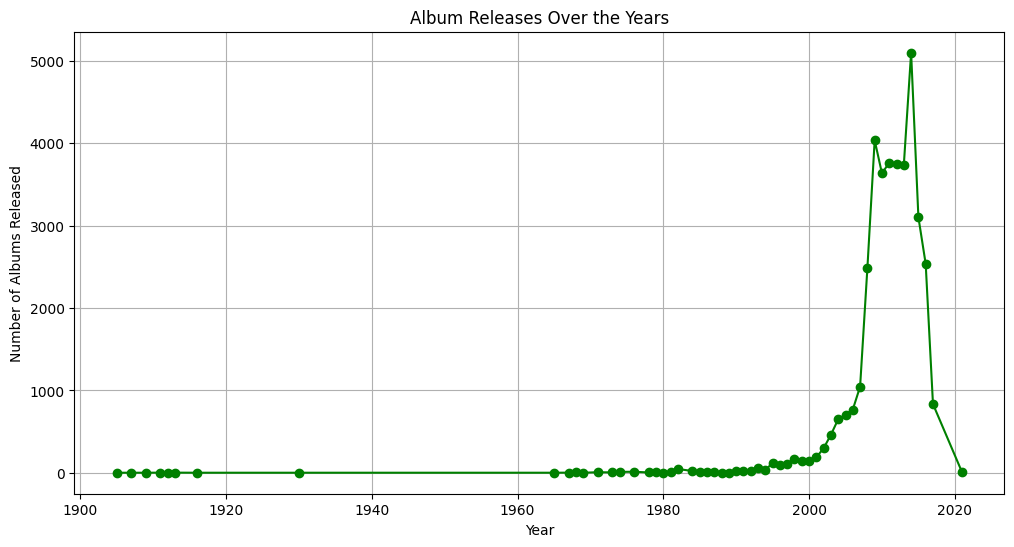

In [ ]:
# Count albums per year
year_counts = final_df["release_year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker="o", linestyle="-", color="green")
plt.xlabel("Year")
plt.ylabel("Number of Albums Released")
plt.title("Album Releases Over the Years")
plt.grid()
plt.show()


<ipython-input-14-6c34f254dfdc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["album_release_date"] = pd.to_datetime(filtered_df["album_release_date"])


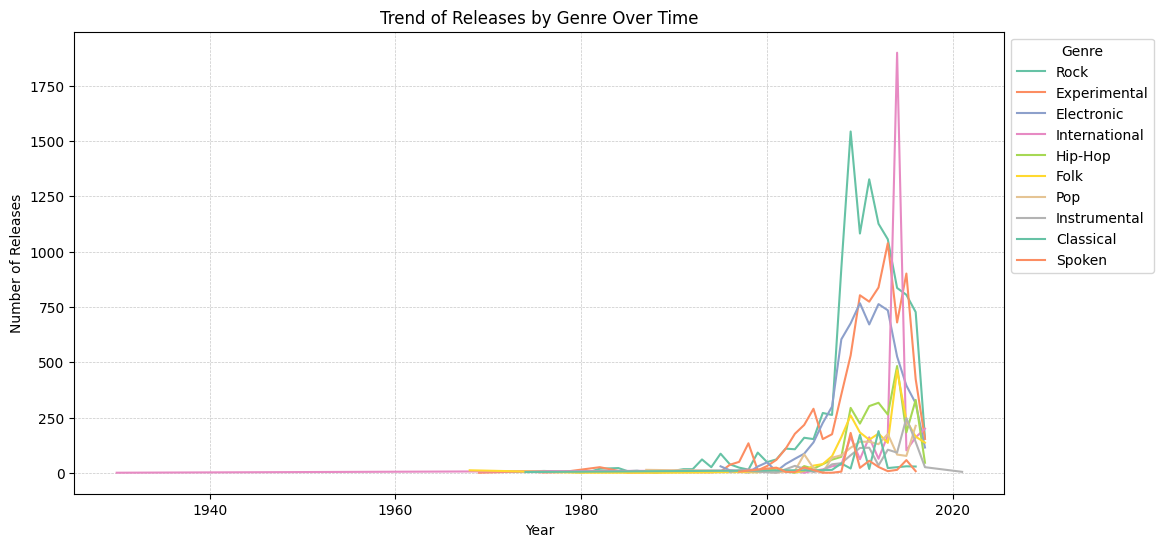

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count occurrences of each genre and get the top 10
genre_counts = final_df["track_genre_top"].value_counts().head(10)
top_10_genres = genre_counts.index

# Filter dataset to include only top 10 genres
filtered_df = final_df[final_df["track_genre_top"].isin(top_10_genres)]

# Convert album_release_date to datetime format (if not already)
filtered_df["album_release_date"] = pd.to_datetime(filtered_df["album_release_date"])

# Group by release date and genre, then count occurrences
genre_trends = (
    filtered_df.groupby([filtered_df["album_release_date"].dt.year, "track_genre_top"])
    .size()
    .reset_index(name="count")
)

# Sort genres by total count for consistent color mapping
genre_trends["track_genre_top"] = pd.Categorical(
    genre_trends["track_genre_top"], categories=top_10_genres, ordered=True
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=genre_trends,
    x="album_release_date",
    y="count",
    hue="track_genre_top",
    hue_order=top_10_genres,
    palette="Set2",
)

plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Trend of Releases by Genre Over Time")
plt.legend(title="Genre", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.show()


In [ ]:
# Assuming 'album_release_date' is your date column
min_date = final_df['album_release_date'].min()
max_date = final_df['album_release_date'].max()

# If you want the range in terms of the number of records as well:
date_range = max_date - min_date

print(f"Range of dates: {min_date} to {max_date}")
print(f"Date range (in days): {date_range.days} days")


Range of dates: 1905-01-10 00:00:00 to 2021-03-01 00:00:00
Date range (in days): 42419 days
